In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
#print input_img
# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu' )(input_img)
print encoded.shape[1:]
#encoded = Dense(128, activation='relu' )(encoded)
encoded = Dense(64, activation='relu' )(encoded)
encoded = Dense(32, activation='relu' )(encoded)
# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(64, activation='relu')(encoded)
decoded2 = Dense(128, activation='relu')(decoded1)
decoded = Dense(784, activation='sigmoid')(decoded2)

Using TensorFlow backend.


(128,)


In [2]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder=Model(input_img, encoded)
L=len(autoencoder.layers)
decoded_input1=Input(shape=(32,))
decoder1=autoencoder.layers[L-3]
decoder2=autoencoder.layers[L-2]
decoder3=autoencoder.layers[L-1]
decoder=Model(decoded_input1, decoder3(decoder2(decoder1(decoded_input1))))
#decoder_layer1=autoencoder.layers[L-1]
#decoder=Model(encoded_input1,decoder_layer1(encoded_input1))
#decoder=Model(encoded_input1,decoder_layer1(encoded_input1))
#encoded_input2=Input(shape=(64,))
#decoder_layer2=autoencoder.layers[L-2]
#decoder2=Model(decoder1,decoder_layer2(decoder1))

In [3]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist 
(x_trainO,_),(x_testO,_)=mnist.load_data()
import numpy as np

In [5]:
x_test=x_testO.reshape(len(x_testO),np.prod(x_testO.shape[1:]))
x_train=x_trainO.reshape(len(x_trainO),np.prod(x_trainO.shape[1:]))
#x_test[1]

In [6]:
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
print x_test.shape
print x_train.shape

(10000, 784)
(60000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.3474 - val_loss: 0.2639
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.2593 - val_loss: 0.2537
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.2441 - val_loss: 0.2326
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.2276 - val_loss: 0.2222
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.2188 - val_loss: 0.2120
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.2079 - val_loss: 0.2006
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.1975 - val_loss: 0.1913
Epoch 8/10
60000/60000 [==============================] - 3s - loss: 0.1878 - val_loss: 0.1841
Epoch 9/10
60000/60000 [==============================] - 3s - loss: 0.1810 - val_loss: 0.1779
Epoch 10/10
60000/60000 [==============================] - 3s - loss: 0.1758 - val_loss: 0.1717

In [8]:
#dec_imgs=autoencoder.predict(x_test)
enc_imgs=encoder.predict(x_test)
dec_imgs=decoder.predict(enc_imgs)
#img=dec_imgs[2].reshape(28,28)
#xtest=x_test[2].reshape(28,28)


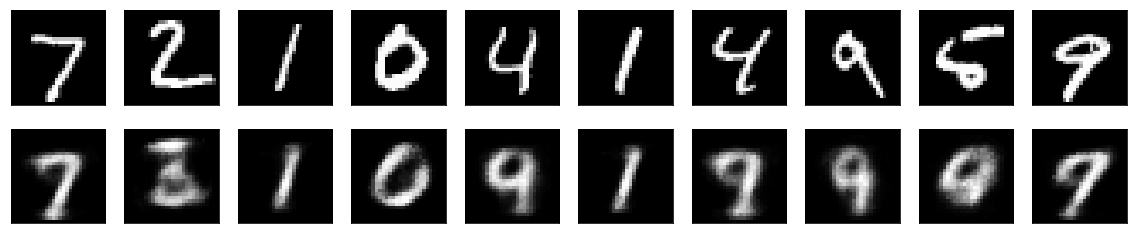

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
n=10
for i in range(n):
    ax=plt.subplot(2, n, i+1)
    xtest=x_test[i].reshape(28,28)
    plt.imshow(xtest)
    plt.gray()
    ax.get_xaxis().set_visible(False)    
    ax.get_yaxis().set_visible(False)        
    ax1=plt.subplot(2, n, n+i+1)    
    img=dec_imgs[i].reshape(28,28)
    plt.imshow(img)    
    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)    
plt.show()